In [1]:
suppressMessages(library(saqgetr))
suppressMessages(library(lubridate))
suppressMessages(library(ggplot2))

In [2]:
site = "es0118a"
# contaminantes a estudiar
pollutants <- c("no", "no2", "o3", "pm10", "pm2.5")

# fechas de inicio y final de toma de datos
start_dt <- ymd_hms("2014-01-01 00:00:00")

In [3]:
dataAQ <- get_saq_observations(site = site,
                             variable = pollutants,
                             valid_only = TRUE,
                             start = start_dt,
                             #end = end_dt,
                             verbose = TRUE
                            )

2021-02-02 16:18:18.918 CET: Loading `air_quality_data_site_es0118a_2014.csv.gz`...

2021-02-02 16:18:19.884 CET: Loading `air_quality_data_site_es0118a_2015.csv.gz`...

2021-02-02 16:18:20.479 CET: Loading `air_quality_data_site_es0118a_2016.csv.gz`...

2021-02-02 16:18:21.119 CET: Loading `air_quality_data_site_es0118a_2017.csv.gz`...

2021-02-02 16:18:21.629 CET: Loading `air_quality_data_site_es0118a_2018.csv.gz`...

2021-02-02 16:18:22.230 CET: Loading `air_quality_data_site_es0118a_2019.csv.gz`...

2021-02-02 16:18:22.611 CET: Loading `air_quality_data_site_es0118a_2020.csv.gz`...

2021-02-02 16:18:23.318 CET: Loading `air_quality_data_site_es0118a_2021.csv.gz`...

2021-02-02 16:18:23.367 CET: Loading `air_quality_data_site_es0118a_2022.csv.gz`...



In [4]:
dataAQ.hour <- saq_clean_observations(dataAQ, 
                                      summary = "hour", 
                                      valid_only = TRUE, 
                                      spread = FALSE)

head(dataAQ.hour)

date,date_end,site,variable,process,summary,validity,unit,value
<dttm>,<dttm>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
2014-01-01 00:00:00,2014-01-01 01:00:00,es0118a,pm10,115326,1,1,ug.m-3,24
2014-01-01 01:00:00,2014-01-01 02:00:00,es0118a,pm10,115326,1,1,ug.m-3,17
2014-01-01 02:00:00,2014-01-01 03:00:00,es0118a,pm10,115326,1,1,ug.m-3,11
2014-01-01 03:00:00,2014-01-01 04:00:00,es0118a,pm10,115326,1,1,ug.m-3,8
2014-01-01 04:00:00,2014-01-01 05:00:00,es0118a,pm10,115326,1,1,ug.m-3,7
2014-01-01 05:00:00,2014-01-01 06:00:00,es0118a,pm10,115326,1,1,ug.m-3,8


In [5]:
dataAQ.all <- dataAQ
dataAQ.all$date <- floor_date(dataAQ.all$date, unit="hour")
dataAQ.all <- aggregate(dataAQ.all$value, 
                        by=list(dataAQ.all$date, dataAQ.all$variable), 
                        mean, na.rm=FALSE, na.action=na.omit)
head(dataAQ.all[dataAQ.all$Group.2 == "pm10", ])

,Group.1,Group.2,x
,<dttm>,<chr>,<dbl>
180812,2014-01-01 00:00:00,pm10,24
180813,2014-01-01 01:00:00,pm10,17
180814,2014-01-01 02:00:00,pm10,11
180815,2014-01-01 03:00:00,pm10,8
180816,2014-01-01 04:00:00,pm10,7
180817,2014-01-01 05:00:00,pm10,8


In [6]:
print(paste("Media R", "vs", "Media Openair", sep="    "))
print(paste(sum(is.na(dataAQ.all)), "vs", sum(is.na(dataAQ.hour)), sep="    "))
print(paste(sum(!is.na(dataAQ.all)), "vs", sum(!is.na(dataAQ.hour)), sep="    "))
print(paste(nrow(dataAQ.all), "vs", nrow(dataAQ.hour), sep="    "))

[1] "Media R    vs    Media Openair"
[1] "0    vs    0"
[1] "896826    vs    3062358"
[1] "298942    vs    340262"


In [7]:
suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=10,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

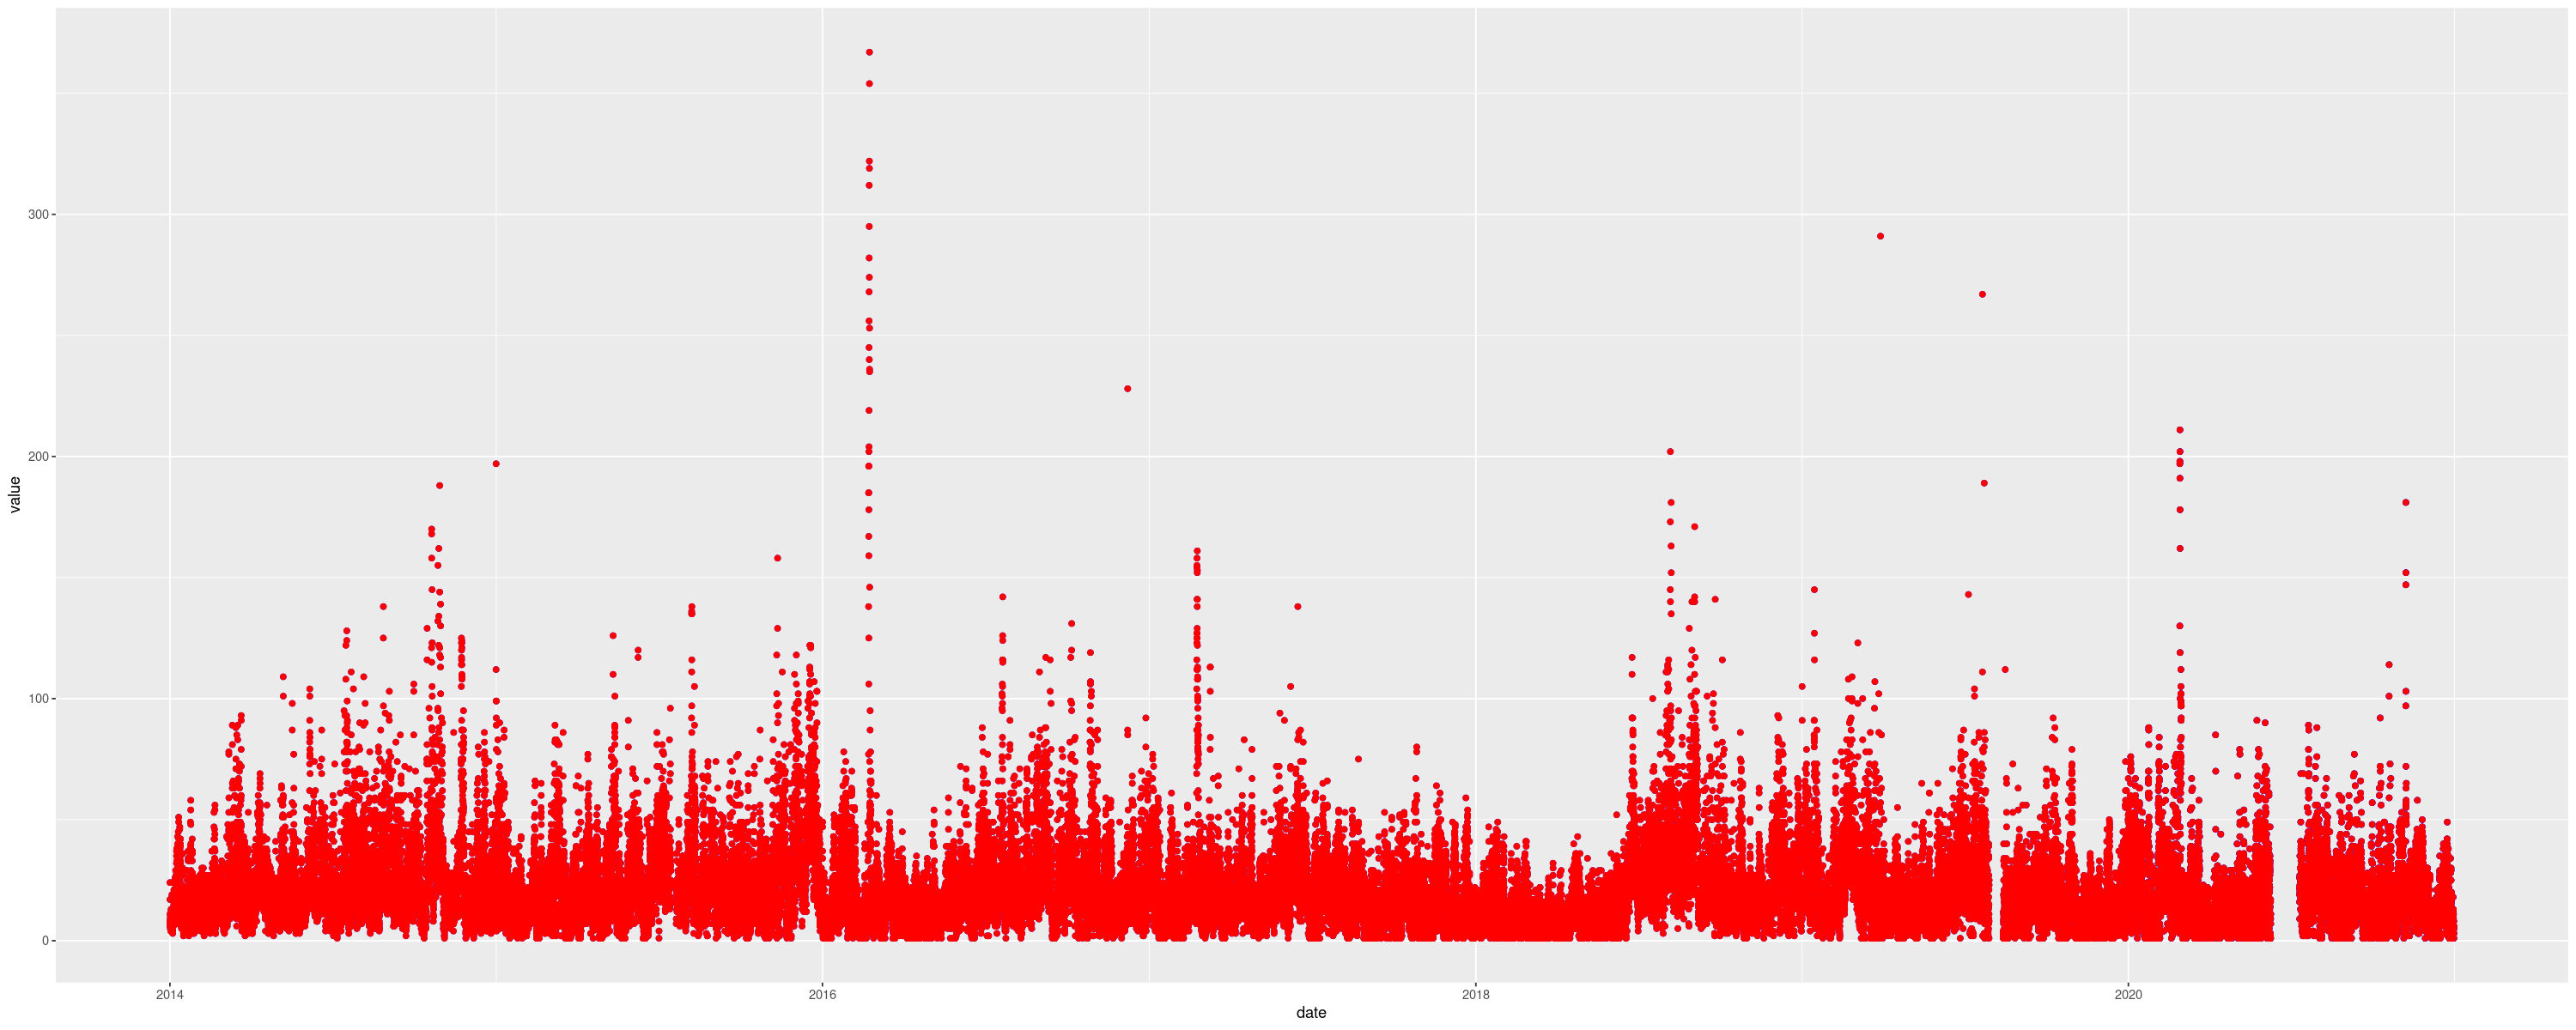

In [8]:
ggplot() +
    geom_point(data=dataAQ.hour[dataAQ.hour$variable == "pm10", ], 
               aes(x=date, y=value), color="blue") +
    geom_point(data=dataAQ.all[dataAQ.all$Group.2 == "pm10", ], 
               aes(x=Group.1, y=x), color="red")